In [1]:
import clip
import torch
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [9]:
device = "cpu"

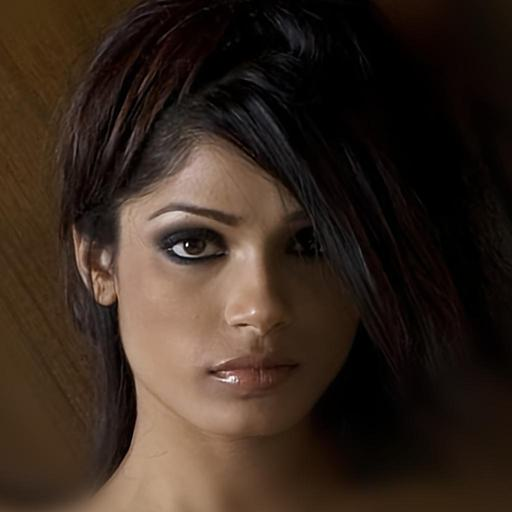

In [6]:
image_pil = Image.open("../data/mmcelebahq/face/27000.jpg")
image_pil

In [7]:
# "She is wearing lipstick. She is attractive and has straight hair."
# "She is young and has straight hair."
# "She wears lipstick. She has straight hair. She is attractive."
# "The woman has straight hair and wears heavy makeup. She is young."
# "This woman has straight hair. She is attractive. She wears heavy makeup."
# "This person has straight hair. She is wearing lipstick."
# "She has straight hair. She is young and wears heavy makeup."
# "She has straight hair and is wearing heavy makeup. She is young."
# "She wears heavy makeup. She is young and has straight hair."
# "This person has straight hair and is wearing heavy makeup. She is attractive."
text = ["This person has straight hair and is wearing heavy makeup. She is attractive."]

In [10]:
model,process = clip.load("ViT-B/16",device=device,download_root="../checkpoints/clip")

In [11]:
image = process(image_pil).unsqueeze(0).to()
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(clip.tokenize(text).to(device))

In [12]:
from torch.nn.functional import cosine_similarity
similarity = cosine_similarity(image_features, text_features, dim=1)

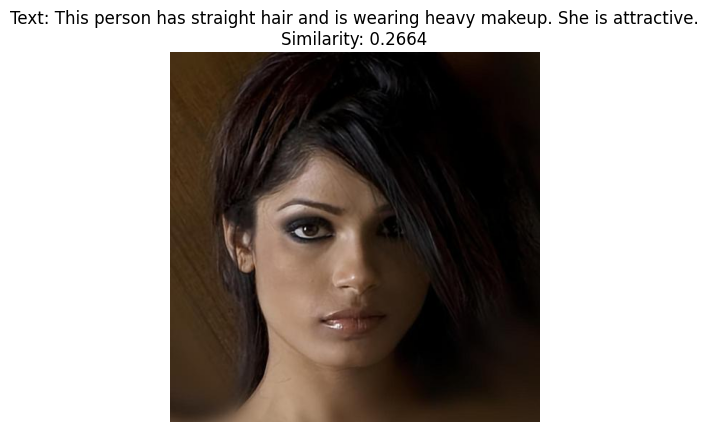

In [13]:
plt.imshow(image_pil)
plt.title(f'Text: {text[0]}\nSimilarity: {similarity.item():.4f}')
plt.axis('off')
plt.show()